In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [388]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [389]:
transactions_data=pd.read_csv("bank_transactions_data_2.csv")
transactions_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [390]:
transactions_data.shape

(2512, 16)

In [391]:
transactions_data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [392]:
transactions_data.duplicated().sum()

0

In [393]:
def statistical_analysis(transactions_data):
    """
    Function to perform statistical analysis on numeric columns of the dataset
    and explain the findings.
    """

    # Select only numeric columns
    numeric_data = transactions_data.select_dtypes(include=['number'])

    if numeric_data.empty:
        print("No numeric data available for analysis.")
        return

    # Compute summary statistics
    summary = numeric_data.describe().T  
    # Transpose to better view the summary
    summary['skewness'] = numeric_data.skew() # Skewness
    summary['kurtosis'] = numeric_data.kurtosis()  # Kurtosis
    print("Statistical Analysis:\n", summary)
    print("\nDetailed Explanation:")

    # Loop through each numeric column to provide detailed insights
    for column in numeric_data.columns:
        mean = numeric_data[column].mean()
        median = numeric_data[column].median()
        std_dev = numeric_data[column].std()
        skew = numeric_data[column].skew()
        kurt = numeric_data[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" - Mean: {mean}")
        print(f" - Median: {median}")
        print(f" - Standard Deviation: {std_dev}")
        print(f" - Skewness: {skew}")
        print(f" - Kurtosis: {kurt}")

        # Interpret skewness
        if skew > 0:
            print(f" - {column} has a positive skew, meaning the data is skewed to the right.")
        elif skew < 0:
            print(f" - {column} has a negative skew, meaning the data is skewed to the left.")
        else:
            print(f" - {column} has a symmetrical distribution.")

        # Interpret kurtosis
        if kurt > 3:
            print(f" - {column} has a leptokurtic distribution (more peaked than normal).")
        elif kurt < 3:
            print(f" - {column} has a platykurtic distribution (flatter than normal).")
        else:
            print(f" - {column} has a mesokurtic distribution (normal peak).")
        return

statistical_analysis(transactions_data)



Statistical Analysis:
                       count         mean          std     min       25%  \
TransactionAmount    2512.0   297.593778   291.946243    0.26    81.885   
CustomerAge          2512.0    44.673965    17.792198   18.00    27.000   
TransactionDuration  2512.0   119.643312    69.963757   10.00    63.000   
LoginAttempts        2512.0     1.124602     0.602662    1.00     1.000   
AccountBalance       2512.0  5114.302966  3900.942499  101.25  1504.370   

                         50%        75%       max  skewness   kurtosis  
TransactionAmount     211.14   414.5275   1919.11  1.740107   3.643021  
CustomerAge            45.00    59.0000     80.00  0.147864  -1.224195  
TransactionDuration   112.50   161.0000    300.00  0.599432  -0.258680  
LoginAttempts           1.00     1.0000      5.00  5.173491  26.669187  
AccountBalance       4735.51  7678.8200  14977.99  0.601201  -0.564766  

Detailed Explanation:

TransactionAmount Statistics:
 - Mean: 297.5937778662421
 - Medi

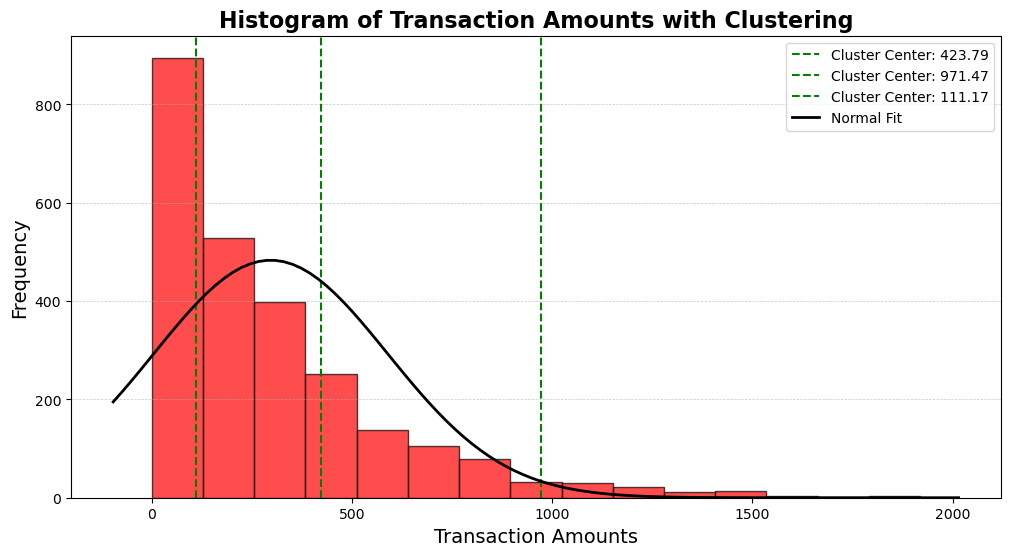

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

def histogram_and_clustering(transactions_data, num_clusters=3):
    """
    Function to create a histogram plot for transaction amounts with clustering and fitting.
    Only displays Clusters 1, 2, and 3.
    """
# Extract the TransactionAmount for analysis
transaction_amounts = transactions_data['TransactionAmount'].values

# Compute mean and median
mean_value = np.mean(transaction_amounts)
median_value = np.median(transaction_amounts)

# K-Means Clustering
# Reshape data for KMeans
transaction_amounts_reshaped = transaction_amounts.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(transaction_amounts_reshaped)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Generate the histogram with design elements
plt.figure(figsize=(12, 6))  # Set figure size
plt.hist(transaction_amounts, bins=15, color='red', edgecolor='black', alpha=0.7)

# Add a grid with customization
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding the title and labels with formatting
plt.title('Histogram of Transaction Amounts with Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amounts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add annotations for mean and median
#plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
#plt.axvline(median_value, color='skyblue', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Plot KMeans cluster centers
for center in centers:
    plt.axvline(center, color='green', linestyle='--', linewidth=1.5, label=f'Cluster Center: {center[0]:.2f}')

# Fit a normal distribution to the data
mu, std = norm.fit(transaction_amounts)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p * len(transaction_amounts) * (xmax - xmin) / 15, 'k', linewidth=2, label='Normal Fit')

# Add a legend
plt.legend(loc='upper right')

# Represent the plot
plt.show()


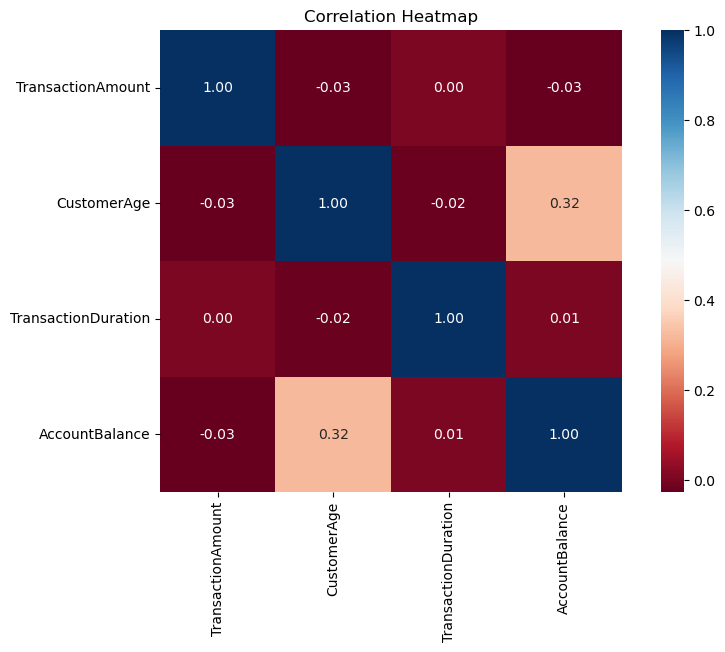

In [395]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_plot(dataset):
    """
    Generates a heatmap for correlation matrix of numerical data in the dataset.
    """
    # Selecting numerical columns
    columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
    
    # Extracting relevant data
    required_data = dataset[columns]
    
    # Computing the correlation matrix
    correlation_matrix = required_data.corr()
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", square=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the heatmap_plot function, passing the DataFrame 'df'
heatmap_plot(df)

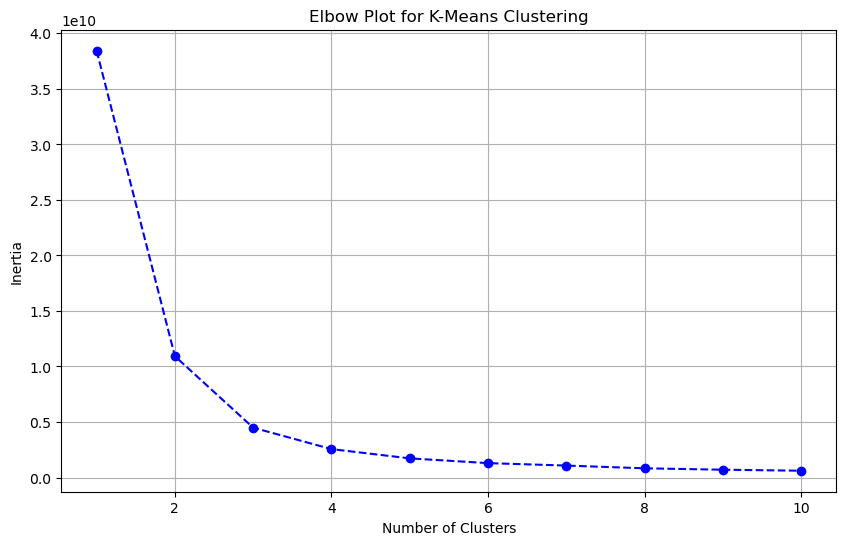

In [396]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_plot(dataset):
    """
    Elbow plot function for determining the optimal number of clusters for K-Means clustering.
    """
    # Select numerical columns for clustering (new combination of columns)
    numerical_data = dataset[['TransactionAmount', 'LoginAttempts', 'TransactionDuration', 'AccountBalance']]
    
    # List to store inertia values (sum of squared distances of samples to their closest cluster center)
    inertia_values = []
    
    # Test cluster counts from 1 to 10
    cluster_range = range(1, 11)
    
    # Perform KMeans clustering for each cluster count (k)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numerical_data)
        inertia_values.append(kmeans.inertia_)
    
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='b')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot for K-Means Clustering')
    plt.grid(True)
    plt.show()

# Assuming 'df' is your DataFrame containing the dataset
# Call the elbow_plot function, passing the DataFrame 'df'
# Example: df = pd.read_csv('your_dataset.csv')
elbow_plot(df)


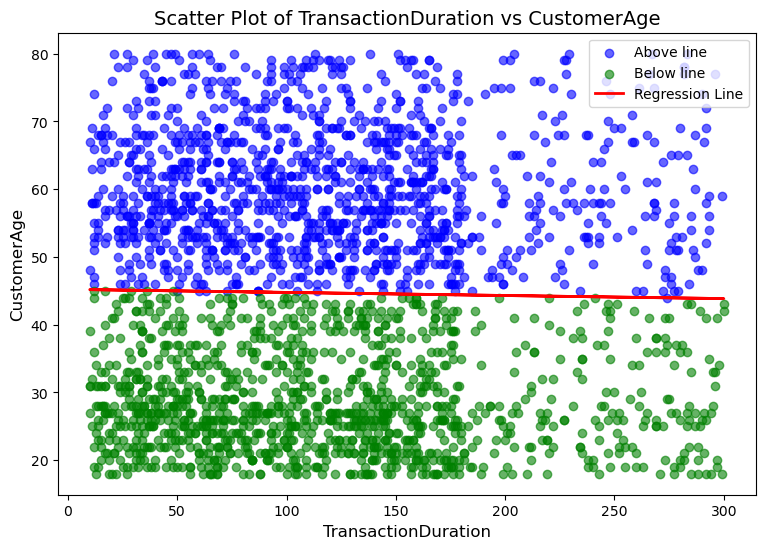

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_scatter_with_regression(df, feature1, feature2):
    """
    Plots a scatter plot of two features with a fitted linear regression line and separates data 
    based on the position relative to the regression line.

    Args:
        df: The DataFrame containing the data.
        feature1: The name of the first feature to visualize.
        feature2: The name of the second feature to visualize.
    """

    # Select two features to plot the scatter plot
    X = df[[feature1]]
    y = df[feature2]

    # Create the scatter plot with figure size
    plt.figure(figsize=(9, 6))
    
    # Fit the linear regression model
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Points above the regression line
    above_line = y > y_pred
    below_line = y <= y_pred

    # Plot points above the regression line in one color (e.g., blue)
    plt.scatter(X[above_line], y[above_line], color='blue', label='Above line', alpha=0.6)
    # Plot points below the regression line in another color (e.g., green)
    plt.scatter(X[below_line], y[below_line], color='green', label='Below line', alpha=0.6)
    
    # Plot the regression line in red
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

    # Set the labels and title
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}', fontsize=14)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

# Call the function to create the scatter plot
# Assuming 'df' is your DataFrame and 'TransactionDuration' and 'CustomerAge' are valid column names
plot_scatter_with_regression(df, 'TransactionDuration', 'CustomerAge')
